In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt

In [3]:
plt.plot(5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [117]:
from wind_tools import *
# matplotlib.rcParams['figure.figsize'] = (16,12) 

In [11]:
proc_dir = Path("/run/media/simone/Simone DATI/TRISONICA_DATA/Processed/")
trs1_path = proc_dir / "TRS1_ep_fixed_axes_ago_sept" / "eddypro_TRS_1_fixed_axes_full_output_2019-12-30T133606_exp.csv"
trs2_uncor_path = proc_dir / "TRS2_cor" / "eddypro_TRS_2_uncor_full_output_2019-12-21T140050_exp.csv"
wm1_path = proc_dir / "WM1_ago_sept" / "eddypro_WM1_full_output_2019-12-20T105458_exp.csv"
wm2_path = proc_dir / "WM1_ago_sept" / "eddypro_WM2_full_output_2019-12-20T124352_exp.csv"
cache_dir = Path("./processed_data")
start_date = '2018-08-10 00:00:05' #no data in the frist 5 mins for TRS2
end_date = '2018-08-13'  # after 14 problems with TRS2
wm1_offset = 310
wm2_offset = 310

In [12]:
wm1, wm2, trs1, trs2 = map(
    lambda p: load_ep_cache(p).loc[start_date:end_date].loc[:,wind_cols].rename(columns=wind_comp_rename),
    [wm1_path, wm2_path, trs1_path, trs2_uncor_path])


In [74]:
dirf = (wm1.wind_dir > 10)& (wm1.wind_dir < 80)

In [75]:
wm1f = wm1[dirf]
trs2f = trs2[dirf]

/home/simone/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# Getting correct rotation angle for TRS2

In [26]:
def wind_speed_comp(df, w_comp):
    """calculate wind speed only with given components"""
    return np.sqrt(df.loc[:, list(w_comp)].pow(2).sum(axis=1)).copy()

In [16]:
def map_trs2_axes(trs2raw):
    # no rotation!! only mapping end trs2 would have w and u rotated
    trs2 = trs2raw.copy()
    trs2.u = -trs2raw.u
    trs2.v = -trs2raw.w
    trs2.w = trs2raw.v
    return trs2

In [18]:
trs2f = map_trs2_axes(trs2f)

In [12]:
trs2m

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2018-08-10 00:10:00,0.083662,0.027778,-0.246330,0.261628,285.745
2018-08-10 00:25:00,0.150920,0.021840,-0.251783,0.294361,302.242
2018-08-10 00:30:00,0.160804,0.025494,-0.179350,0.242227,311.462
2018-08-10 01:25:00,0.050527,-0.018900,-0.233428,0.239581,274.192
2018-08-10 01:30:00,0.142103,0.008496,-0.261334,0.297592,293.670
...,...,...,...,...,...
2018-08-13 12:00:00,0.270108,0.067230,-0.241196,0.368312,309.518
2018-08-13 22:05:00,0.107237,0.062873,-0.276375,0.303044,284.532
2018-08-13 22:35:00,0.045070,0.077730,-0.344097,0.355634,277.894


In [21]:
trs2m.describe()

,u,v,w,wind_speed,wind_dir
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,0.175517,0.041866,-0.378391,0.436595,286.336653
std,0.166963,0.043873,0.182380,0.219387,17.362749
min,-0.341193,-0.074933,-0.970140,0.102963,213.158000
25%,0.058805,0.013827,-0.484594,0.277655,276.437250
50%,0.145850,0.032058,-0.327904,0.371649,287.039500
75%,0.257986,0.065258,-0.246499,0.542580,297.913250
max,0.819310,0.170133,-0.084183,1.270580,334.825000


In [19]:
trs2_wsuw = wind_speed_comp(trs2f, 'uw')

In [20]:
wm1_wsuw = wind_speed_comp(wm1f, ['u', 'w'])

In [21]:
wm1_wsuw.describe(), trs2_wsuw.describe()

(count    222.000000
 mean       0.180833
 std        0.118995
 min        0.003291
 25%        0.078366
 50%        0.164884
 75%        0.254814
 max        0.584778
 dtype: float64, count    222.000000
 mean       0.461773
 std        0.223498
 min        0.167709
 25%        0.287578
 50%        0.399006
 75%        0.597856
 max        1.269819
 dtype: float64)

In [17]:
plt.plot(3)

In [16]:
plt.scatter(wm1_wsuw, trs2_wsuw)

In [20]:
trs2f = add_wind_speed(trs2f)
wm1f = add_wind_speed(wm1f)

In [21]:
plot_components_scatter([wm1f, trs2f], ['wind_speed'])

FigureCanvasNbAgg()

In [92]:
# diffs = pd.DataFrame([wm1f.wind_speed - trs2f.wind_speed, 45 - wm1f.wind_dir ]). transpose()

In [91]:
# sns.distplot(diffs.wind_speed)

In [93]:
# plt.scatter(diffs.wind_speed, diffs.wind_dir.abs())

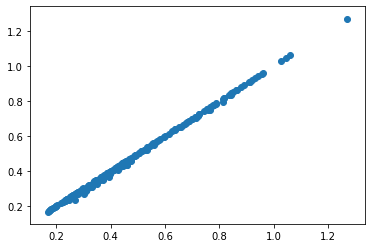

In [101]:
plt.scatter(wind_speed_comp(trs2f, 'uwv'), wind_speed_comp(trs2f, 'uw'))

In [139]:
trs2f_r = trs2f.drop(columns='wind_dir')
trs2f_r = rotate_wind_comp(trs2f, -45, ['u', 'w'])
trs2f_r = add_wind_speed(trs2f_r)

In [126]:
test_close(wind_speed(trs2f), wind_speed(trs2f_r))

In [140]:
trs2f_r.describe()

,u,v,w,wind_speed,wind_dir
count,222.000000,222.000000,222.000000,222.000000,222.000000
mean,-0.107634,-0.405387,-0.166473,0.466225,287.137293
std,0.119963,0.182485,0.124767,0.222414,15.145200
min,-0.548307,-0.970140,-0.610372,0.168869,232.866000
25%,-0.169240,-0.538622,-0.220661,0.296719,278.448000
50%,-0.087226,-0.351492,-0.141319,0.400958,287.100500
75%,-0.021348,-0.259952,-0.081183,0.599506,297.281500
max,0.165235,-0.127283,0.163976,1.270577,319.420000


In [128]:
wm1f.describe()

,u,v,w,wind_speed,wind_dir
count,222.000000,222.000000,222.000000,222.000000,222.000000
mean,-0.020171,0.398125,0.034410,0.445203,39.657079
std,0.203912,0.233694,0.061889,0.248476,21.687798
min,-0.584190,0.027800,-0.108043,0.048692,10.098200
25%,-0.169606,0.221943,-0.011996,0.256387,18.707875
50%,-0.019742,0.336838,0.028365,0.384748,34.541100
75%,0.133717,0.562023,0.080427,0.630531,60.275675
max,0.509007,1.533880,0.214643,1.563550,79.741100


In [136]:
wm1f_hor_ws = wind_speed_comp(wm1f, 'uv')
wm1f_hor_ws.describe()

count    222.000000
mean       0.439328
std        0.248879
min        0.047072
25%        0.249700
50%        0.378846
75%        0.626100
max        1.559300
dtype: float64

In [141]:
trs2f_r_hor_ws = wind_speed_comp(trs2f_r, 'uv')
trs2f_r_hor_ws.describe()

count    222.000000
mean       0.427565
std        0.201923
min        0.145461
25%        0.268965
50%        0.362928
75%        0.572671
max        1.114366
dtype: float64

In [ ]:
def mbe(a,b): return (a-b).abs().mean()

In [142]:
(trs2f_r_hor_ws - wm1f_hor_ws).abs().describe()

count    222.000000
mean       0.090994
std        0.079752
min        0.000519
25%        0.035238
50%        0.073940
75%        0.124571
max        0.605790
dtype: float64

In [98]:
trs2f.describe()

,u,v,w,wind_speed,wind_dir
count,222.000000,222.000000,222.000000,222.000000,222.000000
mean,-0.193823,-0.405387,-0.041606,0.466225,287.137293
std,0.167421,0.182485,0.043911,0.222414,15.145200
min,-0.819310,-0.970140,-0.170133,0.168869,232.866000
25%,-0.274060,-0.538622,-0.064003,0.296719,278.448000
50%,-0.152496,-0.351492,-0.030520,0.400957,287.100500
75%,-0.074388,-0.259952,-0.014895,0.599506,297.281500
max,0.232787,-0.127283,0.074933,1.270580,319.420000


In [48]:
wind_speed_comp(wm1f, ['hor_wind_speed', 'w']).describe()

count    223.000000
mean       0.443206
std        0.249702
min        0.000000
25%        0.253511
50%        0.382897
75%        0.629811
max        1.563557
dtype: float64

In [50]:
wind_speed_comp(trs2f_r, 'uw').describe()

count    222.000000
mean       0.461773
std        0.223498
min        0.167709
25%        0.287578
50%        0.399006
75%        0.597856
max        1.269819
dtype: float64

In [115]:
plot_components_scatter([trs2f_r, wm1f], ['w'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [123]:
ax = get_ax()
sns.distplot(trs2f_r.w, label="TRS2", ax=ax)
sns.distplot(wm1f.w,label="WM1", ax=ax)
ax.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [124]:
ax = get_ax()
sns.distplot(wm1f.w-trs2f_r.w, ax = ax )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

# minimize w error

In [80]:
def mse(x, y): return (x-y).pow(2).mean()
errs = []
for i in range(0, 360):
    pred = rotate_wind_comp(trs2f, i, ['u', 'w'])
    errs.append((i, mse(pred.w , wm1f.w)))
errs = pd.DataFrame(errs, columns=['ang','mse'])

In [83]:
errs

,ang,mse
0,0,0.010281
1,1,0.009769
2,2,0.009293
3,3,0.008856
4,4,0.008457
...,...,...
355,355,0.013393
356,356,0.012699
357,357,0.012041
358,358,0.011418


In [85]:
errs.iloc[errs.mse.nsmallest(10).index]

,ang,mse
14,14,0.006610
13,13,0.006619
15,15,0.006639
12,12,0.006666
16,16,0.006707
11,11,0.006753
17,17,0.006814
10,10,0.006879
182,182,0.006945
18,18,0.006958


In [86]:
#try to rotate with 15 degrees to see what happens

In [90]:
trs2f_r = trs2f.drop(columns='wind_dir')
trs2f_r[['u', 'w']] = rotate_wind_comp(trs2f, -45, ['u', 'w'])
plot_components_scatter([trs2f_r, wm1f], ['w'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

# minimize horizontal wind error

In [144]:
errs = []
for i in range(0, 360):
    pred = rotate_wind_comp(trs2f, i, ['u', 'w'])
    hor_ws = wind_speed_comp(pred, 'uv')
    errs.append((i, mse(hor_ws, wm1f_hor_ws)))
errs = pd.DataFrame(errs, columns=['ang','mse'])

In [145]:
errs

,ang,mse
0,0,0.012296
1,1,0.012299
2,2,0.012302
3,3,0.012306
4,4,0.012310
...,...,...
355,355,0.012287
356,356,0.012287
357,357,0.012288
358,358,0.012290


In [146]:
errs.iloc[errs.mse.nsmallest(10).index]

,ang,mse
175,175,0.012287
355,355,0.012287
176,176,0.012287
356,356,0.012287
174,174,0.012287
354,354,0.012287
357,357,0.012288
177,177,0.012288
173,173,0.012289
353,353,0.012289


In [86]:
#try to rotate with 15 degrees to see what happens

In [90]:
trs2f_r = trs2f.drop(columns='wind_dir')
trs2f_r[['u', 'w']] = rotate_wind_comp(trs2f, -45, ['u', 'w'])
plot_components_scatter([trs2f_r, wm1f], ['w'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

## Rotate wm1 and wm2

In [94]:
wm1[['u', 'v']] = rotate_wind(wm1, wm1_offset)
wm2[['u', 'v']] = rotate_wind(wm2, wm2_offset)
wm2[['u', 'v']] = rotate_wind(wm2, wm2_offset)

In [16]:
wm1.head()

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2018-08-10 00:00:00,-0.089814,0.328250,-0.040250,0.342688,70.18500
2018-08-10 00:05:00,-0.053267,-0.073972,-0.011260,0.091848,324.05700
2018-08-10 00:10:00,-0.092270,0.257561,0.002430,0.273601,63.15740
2018-08-10 00:15:00,0.013693,0.548216,-0.038427,0.549732,88.82570
2018-08-10 00:20:00,-0.196309,0.072619,-0.000057,0.209310,7.57064


In [24]:
get_wind_dir(wm1)

date_time
2018-08-10 00:00:00     74.697560
2018-08-10 00:05:00    305.757571
2018-08-10 00:10:00     70.290144
2018-08-10 00:15:00     91.430833
2018-08-10 00:20:00     20.300695
                          ...    
2018-08-13 23:35:00     78.487743
2018-08-13 23:40:00     85.581399
2018-08-13 23:45:00    251.099107
2018-08-13 23:50:00    245.202655
2018-08-13 23:55:00     94.587208
Length: 1152, dtype: float64

## Plots

In [23]:
plot_components_scatter(wm1, trs1)

In [26]:
# TRS2

In [6]:
trs2.u = -trs2.u

In [31]:
rotate_wind(trs2, 45).describe()

,u,v
count,1151.000000,1151.000000
mean,-0.065467,-0.063058
std,0.220570,0.498316
min,-0.723961,-1.540158
25%,-0.203559,-0.361809
50%,-0.119599,-0.156856
75%,0.024361,0.239518
max,0.709804,1.501328


In [7]:
dirf = (wm1.wind_dir > 10)& (wm1.wind_dir < 90)

In [9]:
wm1f = wm1[dirf]
trs2f = trs2[dirf]

In [101]:
wm1

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2018-08-10 00:05:00,-0.053267,-0.073972,-0.011260,0.091848,324.05700
2018-08-10 00:10:00,-0.092270,0.257561,0.002430,0.273601,63.15740
2018-08-10 00:15:00,0.013693,0.548216,-0.038427,0.549732,88.82570
2018-08-10 00:20:00,-0.196309,0.072619,-0.000057,0.209310,7.57064
2018-08-10 00:25:00,-0.139077,0.163990,-0.044640,0.219609,44.61870
...,...,...,...,...,...
2018-08-13 23:35:00,-0.079398,0.389829,-0.007867,0.397910,68.55510
2018-08-13 23:40:00,-0.043165,0.558604,-0.017203,0.560534,87.19810
2018-08-13 23:45:00,0.103497,-0.302276,-0.040067,0.322006,256.32400


In [91]:
trs2

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2018-08-10 00:05:00,0.034900,-0.201257,-0.020600,0.205296,277.793
2018-08-10 00:10:00,0.083662,-0.246330,-0.027778,0.261628,285.745
2018-08-10 00:15:00,0.125977,-0.225707,-0.004430,0.258521,296.182
2018-08-10 00:20:00,0.135905,-0.254540,-0.000083,0.288549,295.038
2018-08-10 00:25:00,0.150920,-0.251783,-0.021840,0.294361,302.242
...,...,...,...,...,...
2018-08-13 23:35:00,0.133953,-0.263960,-0.103550,0.313594,285.754
2018-08-13 23:40:00,0.193568,-0.282000,-0.093720,0.354649,299.575
2018-08-13 23:45:00,-0.056125,-0.067788,-0.040457,0.096861,226.108


In [78]:
wm1f.describe()

,u,v,w,wind_speed,wind_dir
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,-0.316924,0.240852,0.034075,0.444743,39.793975
std,0.265727,0.159426,0.061951,0.248010,21.735248
min,-1.355262,-0.011001,-0.108043,0.048692,10.098200
25%,-0.491366,0.111809,-0.012272,0.257328,18.732150
50%,-0.228488,0.208603,0.028043,0.382896,34.690600
75%,-0.098938,0.324366,0.079912,0.629811,60.710800
max,0.023164,0.882177,0.214643,1.563550,79.741100


In [10]:
trs2f_r = rotate_wind(trs2f, -45).rename(columns={'v': 'w'}); trs2f_r

,u,w
date_time,,
2018-08-10 00:10:00,0.233339,-0.115024
2018-08-10 00:25:00,0.284754,-0.071321
2018-08-10 00:30:00,0.240525,-0.013114
2018-08-10 01:25:00,0.200786,-0.129331
2018-08-10 01:30:00,0.285273,-0.084309
...,...,...
2018-08-13 12:00:00,0.361547,0.020444
2018-08-13 22:05:00,0.271255,-0.119599
2018-08-13 22:35:00,0.275183,-0.211444


In [11]:
trs2f_r.plot_info = {'label': 'TRS2', 'color': "royalblue"}
wm1f.plot_info = {'label': 'WM1', 'color': "green"}

/home/simone/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/simone/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [114]:

plot_components_scatter(trs2f_r, wm1f, "w")

#### test with wind_speed

In [12]:
trs2f_r = add_wind_speed(trs2f)
wm1f = add_wind_speed(wm1f)

In [15]:
trs2f.plot_info = {'label': 'TRS2', 'color': "royalblue"}
wm1f.plot_info = {'label': 'WM1', 'color': "green"}

/home/simone/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/simone/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [13]:
plot_components([trs2f, wm1f], ['wind_speed'])

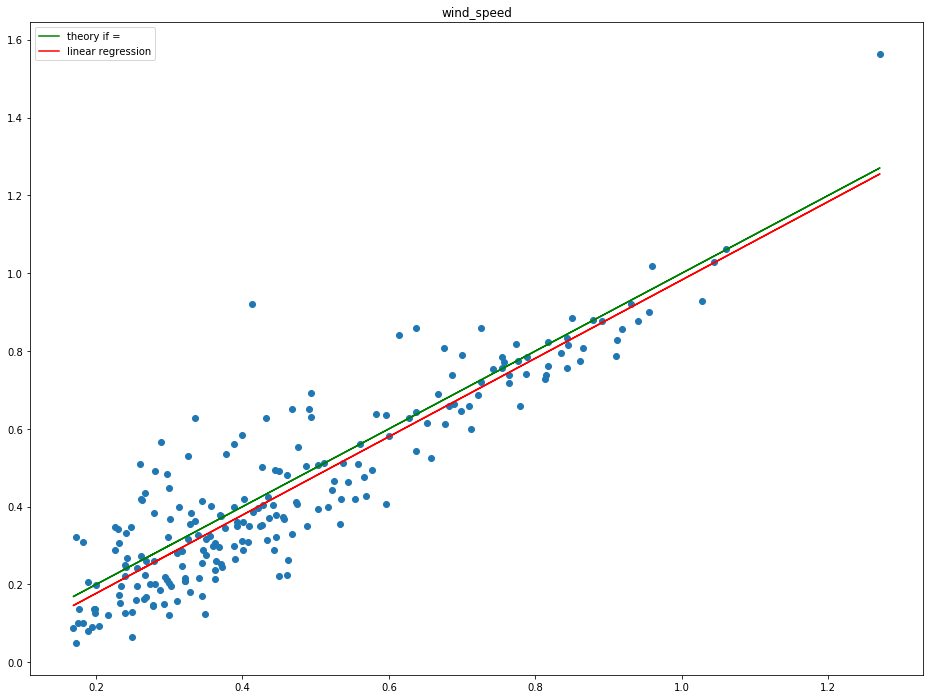

In [138]:
plot_components_scatter([trs2f, wm1f], ['wind_speed'])

In [16]:
plot_components_scatter([trs2f, wm1f], ['wind_speed'])

# Try to fit rotation to find w

In [121]:
import torch

ModuleNotFoundError: No module named 'torch'

In [145]:
def mse(x, y): return (x-y).pow(2).mean()

In [ ]:
y_train = wm1f.w
x_train = trs2f

In [151]:
errs = []
for i in range(-180, 180):
    pred = rotate_wind(trs2f, i).v
    errs.append((i, mse(pred , wm1f.w)))
errs = pd.DataFrame(errs, columns=['ang','mse'])

In [164]:
errs.iloc[errs.mse.nsmallest(10).index]

,ang,mse
57,-123,0.007027
56,-124,0.007069
58,-122,0.007132
55,-125,0.007259
59,-121,0.007386
54,-126,0.007595
60,-120,0.007789
53,-127,0.008077
61,-119,0.008341
52,-128,0.008703


In [156]:
errs.iloc[57]

ang   -123.000000
mse      0.007027
Name: 57, dtype: float64

In [10]:
trs2f_r = rotate_wind(trs2f, -120).rename(columns={'v': 'w'}); trs2f_r

,u,w
date_time,,
2018-08-10 00:10:00,0.255159,0.050712
2018-08-10 00:15:00,0.258456,0.003754
2018-08-10 00:25:00,0.293510,-0.004809
2018-08-10 00:30:00,0.235724,-0.049585
2018-08-10 00:45:00,0.202144,-0.032217
...,...,...
2018-08-13 22:25:00,0.192021,0.182551
2018-08-13 22:35:00,0.320532,0.133017
2018-08-13 22:55:00,0.265624,0.153626


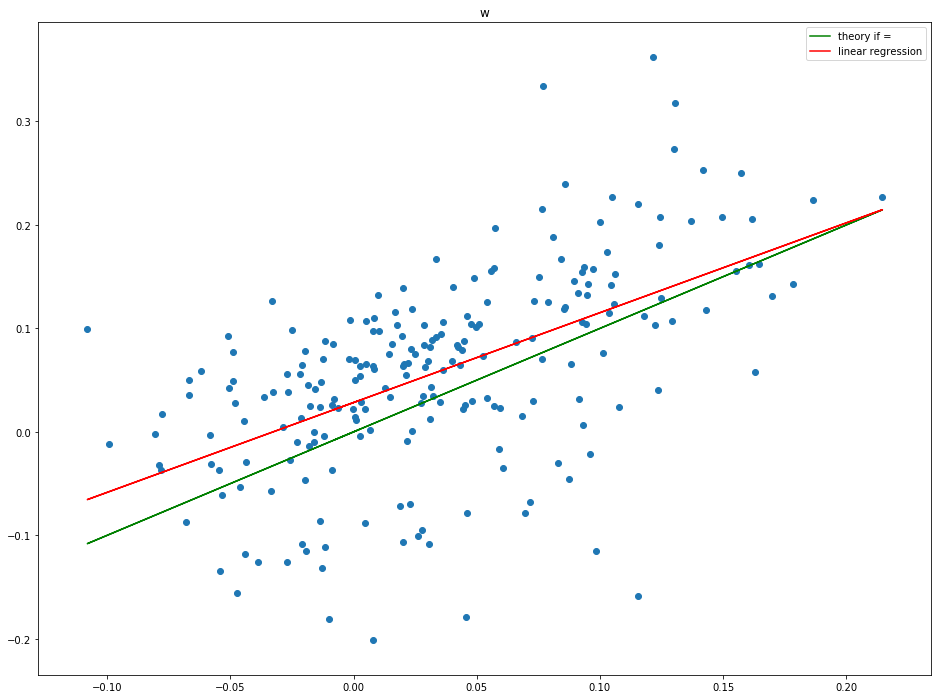

In [159]:
plot_components_scatter([wm1f, trs2f_r], 'w')

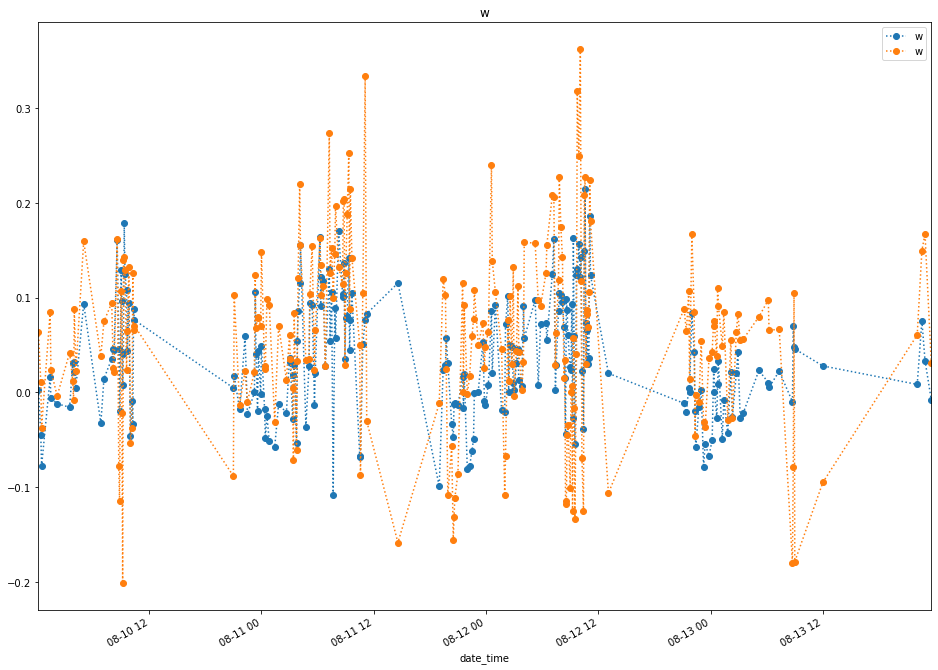

In [177]:
plot_components([wm1f, trs2f_r], 'w', style="o:")

In [17]:
trs2f_r.plot_info = {'label': 'TRS2', 'color': "royalblue"}
wm1f.plot_info = {'label': 'WM1', 'color': "green"}
plot_components([wm1f, trs2f_r], 'w', linestyle=":", marker="o")

/home/simone/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [54]:
(rotate_wind(trs2f, -45).v - wm1f.w).abs().nsmallest(10)

date_time
2018-08-10 17:20:00    0.000383
2018-08-13 00:55:00    0.000916
2018-08-10 21:55:00    0.001363
2018-08-10 13:15:00    0.001564
2018-08-12 21:05:00    0.001780
2018-08-12 13:05:00    0.002752
2018-08-12 22:20:00    0.003131
2018-08-13 02:35:00    0.003180
2018-08-11 10:35:00    0.003814
2018-08-12 16:05:00    0.003845
dtype: float64

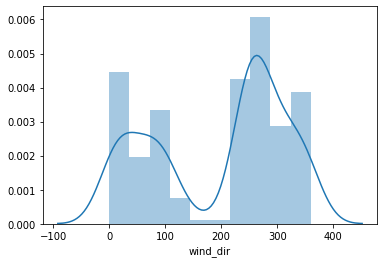

In [49]:
sns.distplot(wm1.wind_dir)